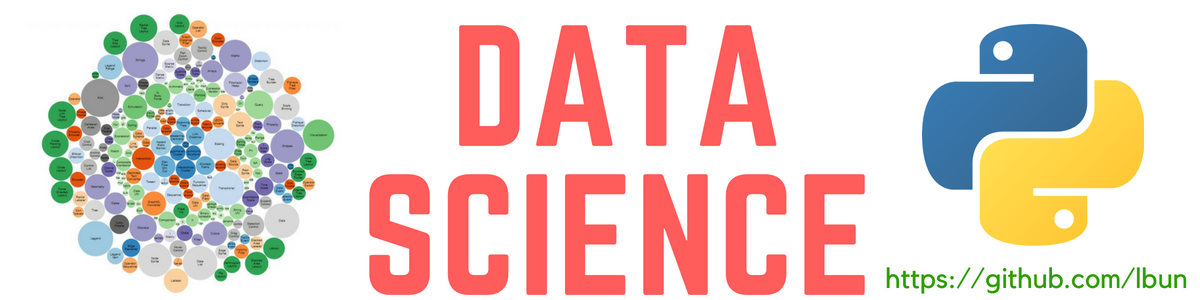

In [1]:
from IPython.display import Image
Image(filename='Jupyter-starter-image.png') 

In [2]:
"""
Example of when we can use KNN
Suppose we have Horses vs Dogs and our data are weights and Heights. 
If we compare these two dimension in a scatterplot, we'll see clearly that we could classify
the animals in 2 different areas.

Steps of the model:
1. Calculate the distance from x to all points in your data
2. Sort the point in your data by increasing distance from x
3. Predict the majority label of the "k" closest point

Choosing a "k", will affect what class a new point is assiged to
k indicates the number of point to consider around x considering circles,
the higher k the bigger the circle that will include more points

Model PROs and CONs -->
PROs: very simple,training is trivial,works with any number of classes, 
    easy to add more data, few parameters (k,Distance Metric)
CONs: High Prediction Cost (worse for large data sets), 
    not good with high dimensional data, categorical features don't work well
    
This model is supervised. This mean that we know our target variable, so what we want to 
predict. When we create a machine learning model it is important to evaluate it to see its 
performance. For this reason we need to split the data in 2 parts. The first part 
(usually 70-80%) is used to train the model and the second one to test it.
    """

'\nExample of when we can use KNN\nSuppose we have Horses vs Dogs and our data are weights and Heights. \nIf we compare these two dimension in a scatterplot, we\'ll see clearly that we could classify\nthe animals in 2 different areas.\n\nSteps of the model:\n1. Calculate the distance from x to all points in your data\n2. Sort the point in your data by increasing distance from x\n3. Predict the majority label of the "k" closest point\n\nChoosing a "k", will affect what class a new point is assiged to\nk indicates the number of point to consider around x considering circles,\nthe higher k the bigger the circle that will include more points\n\nModel PROs and CONs -->\nPROs: very simple,training is trivial,works with any number of classes, \n    easy to add more data, few parameters (k,Distance Metric)\nCONs: High Prediction Cost (worse for large data sets), \n    not good with high dimensional data, categorical features don\'t work well\n    \nThis model is supervised. This mean that we k

In [3]:
#Let's import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Let's read the data

In [6]:
df = pd.read_csv('Classified Data',index_col=0)

In [7]:
#Let's Explore the data

In [8]:
#Let's see the header of our data that actually we don't know what they are

In [9]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
#Let's have a quick summary of our data

In [11]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [12]:
#Let's check if we have null values

In [13]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [14]:
#Let's standardize the data that will be used in the model in order to fasten the 
#machine learning process. But we need to drop the Target value

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [16]:
#Now we can create a DataFrame from the data 

In [17]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [18]:
#Now we need the list of the columns that will be th einput for our model execpt the last

In [19]:
df_feat.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE'], dtype='object')

In [20]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [21]:
# Now we split the input and target data in training and test set 

In [22]:
from sklearn.model_selection import train_test_split
X=df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
# Now that we have prepared the model we can start to create and fit the model to make pred.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [25]:
# Now that we have the predictions we can evaluate the model

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print (confusion_matrix(y_test,pred))
print('The accuracy of the model is {} %'.format((confusion_matrix(y_test,pred)[0][0]
                                                   +confusion_matrix(y_test,pred)[1][1])/
                                                  confusion_matrix(y_test,pred).sum()*100))
first_accuracy=round(((confusion_matrix(y_test,pred)[0][0]+
                        confusion_matrix(y_test,pred)[1][1])/
                        confusion_matrix(y_test,pred).sum())*100,1)

[[151   8]
 [ 15 126]]
The accuracy of the model is 92.33333333333333 %


In [27]:
print (classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [28]:
# Now we can explore if we can choose a better k to improve the model
# For this we'll make a for loop changing the k value and saving the error in an array 
# in order to examinate the graph of error function and take the k with the lowest error

In [29]:
error_rate= []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [30]:
# Now we can plot the error rate funtion vs the k value

Text(0,0.5,'Error Rate')

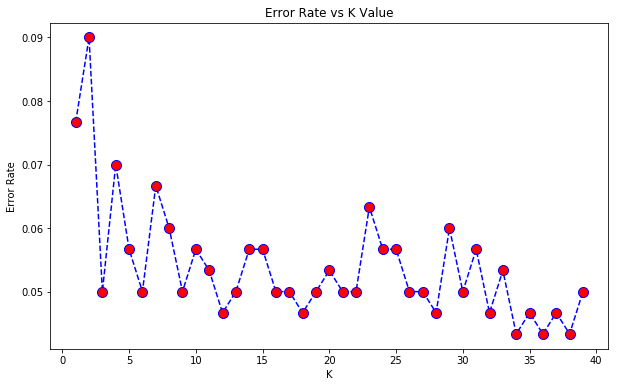

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
# The value 17 could be a good fit to our model
# So let's use k=17 and let's create and evaluate a new model

In [33]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('This is the confusion matrix')
print (confusion_matrix(y_test,pred))
print('The accuracy of the model was {}% and now is {}%'.format(first_accuracy,(confusion_matrix(y_test,pred)[0][0]
                                                   +confusion_matrix(y_test,pred)[1][1])/
                                                  confusion_matrix(y_test,pred).sum()*100))
print('\n')
print('This is the classification report')
print (classification_report(y_test,pred))

This is the confusion matrix
[[153   6]
 [  9 132]]
The accuracy of the model was 92.3% and now is 95.0%


This is the classification report
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300

